In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import to_categorical

Load CIFAR-10 Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

One-hot encode the labels

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Choose between ResNet50 or VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Freeze the convolutional base

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

Add custom dense layers

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

Create the final model

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 745s 951ms/step - accuracy: 0.4691 - loss: 1.5011 - val_accuracy: 0.5706 - val_loss: 1.2285
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 811s 962ms/step - accuracy: 0.5919 - loss: 1.1809 - val_accuracy: 0.5727 - val_loss: 1.1997
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 798s 958ms/step - accuracy: 0.6143 - loss: 1.0980 - val_accuracy: 0.5985 - val_loss: 1.1426
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 782s 933ms/step - accuracy: 0.6355 - loss: 1.0341 - val_accuracy: 0.5997 - val_loss: 1.1400
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 760s 955ms/step - accuracy: 0.6504 - loss: 0.9964 - val_accuracy: 0.6063 - val_loss: 1.1278
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 777s 923ms/step - accuracy: 0.6663 - loss: 0.9528 - val_accuracy: 0.6152 - val_loss: 1.0909
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 747s 929ms/step - accuracy: 0.6813 - loss: 0.9058 - val_accuracy: 0.6194 - val_loss: 1.0954
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 767s 960ms/step - accuracy: 0.6988 -

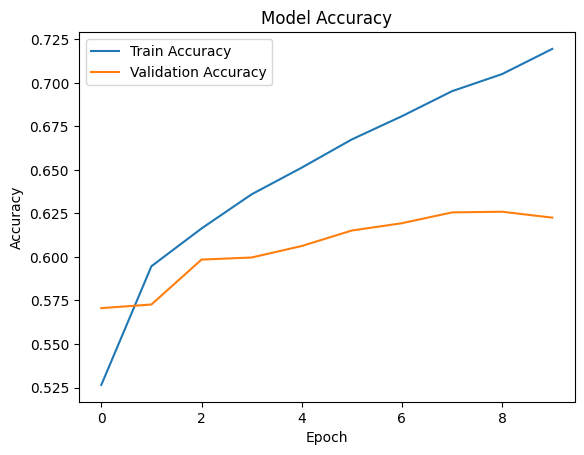

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

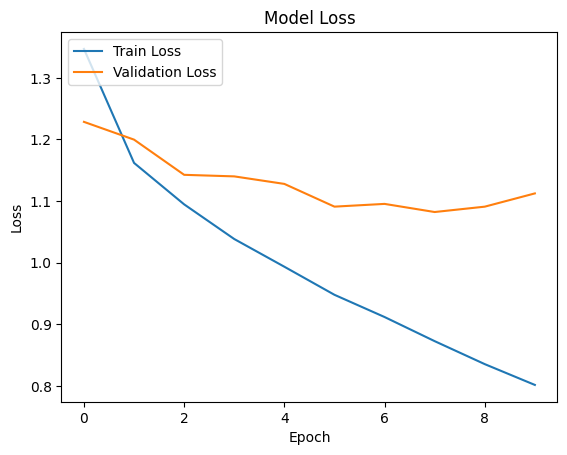

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# prompt: accuray

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 133s 423ms/step
Accuracy: 0.6226
Precision: 0.6298746260811756
Recall: 0.6226
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69      1000
           1       0.76      0.60      0.67      1000
           2       0.52      0.56      0.54      1000
           3       0.47      0.43      0.45      1000
           4       0.57      0.55      0.56      1000
           5       0.58      0.52      0.55      1000
           6       0.60      0.76      0.67      1000
           7       0.75      0.63      0.69      1000
           8       0.69      0.80      0.74      1000
           9       0.58      0.74      0.65      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

